In [1]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])  # Нормализуем в диапазоне [-1, 1]
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

In [ ]:
import torch.nn as nn

class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.fc1 = nn.Linear(100, 256)
        self.fc2 = nn.Linear(256, 512)
        self.fc3 = nn.Linear(512, 1024)
        self.fc4 = nn.Linear(1024, 28*28)
        self.relu = nn.ReLU()
        self.tanh = nn.Tanh()

    def forward(self, z):
        return self.generator(x).view(-1, 1, 28, 28)

In [9]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.fc1 = nn.Linear(28*28, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 1)
        self.leaky_relu = nn.LeakyReLU(0.2)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.leaky_relu(self.fc1(x))
        x = self.leaky_relu(self.fc2(x))
        x = self.leaky_relu(self.fc3(x))
        x = self.fc4(x)
        x = self.sigmoid(x)
        return x

In [10]:
generator = Generator().to(device)
discriminator = Discriminator().to(device)

In [11]:
import torch.optim as optim
# Определяем оптимизаторы
lr = 0.0002
betas = (0.5, 0.999)

optimizer_G = optim.Adam(generator.parameters(), lr=lr, betas=betas)
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr, betas=betas)

# Функция потерь
criterion = nn.BCELoss()

Epoch [0/5], Step [0/938], Loss D: 0.3456367552280426, Loss G: 2.706357955932617
Epoch [0/5], Step [100/938], Loss D: 1.2352869901806116, Loss G: 2.6625120639801025
Epoch [0/5], Step [200/938], Loss D: 0.5867919325828552, Loss G: 2.2102699279785156
Epoch [0/5], Step [300/938], Loss D: 0.6537427008152008, Loss G: 2.811872720718384
Epoch [0/5], Step [400/938], Loss D: 0.546855092048645, Loss G: 2.788684844970703
Epoch [0/5], Step [500/938], Loss D: 0.6272332668304443, Loss G: 1.534175992012024
Epoch [0/5], Step [600/938], Loss D: 0.7345924377441406, Loss G: 2.075765609741211
Epoch [0/5], Step [700/938], Loss D: 0.8650755286216736, Loss G: 1.4417757987976074
Epoch [0/5], Step [800/938], Loss D: 0.553797572851181, Loss G: 1.9084908962249756
Epoch [0/5], Step [900/938], Loss D: 0.837243378162384, Loss G: 1.7556712627410889


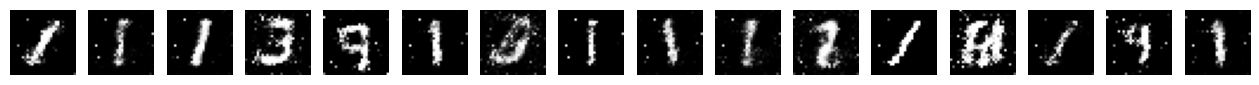

Epoch [1/5], Step [0/938], Loss D: 0.7576596438884735, Loss G: 2.5107474327087402
Epoch [1/5], Step [100/938], Loss D: 0.8193614780902863, Loss G: 1.5814671516418457
Epoch [1/5], Step [200/938], Loss D: 0.7112825363874435, Loss G: 1.4530929327011108
Epoch [1/5], Step [300/938], Loss D: 0.7067647278308868, Loss G: 1.7245858907699585
Epoch [1/5], Step [400/938], Loss D: 0.6872569024562836, Loss G: 1.7332980632781982
Epoch [1/5], Step [500/938], Loss D: 0.777739942073822, Loss G: 2.2073874473571777
Epoch [1/5], Step [600/938], Loss D: 0.7092713117599487, Loss G: 2.309769630432129
Epoch [1/5], Step [700/938], Loss D: 0.9742999970912933, Loss G: 1.2481023073196411
Epoch [1/5], Step [800/938], Loss D: 0.9058381468057632, Loss G: 2.4515912532806396
Epoch [1/5], Step [900/938], Loss D: 0.8550115823745728, Loss G: 1.4625277519226074


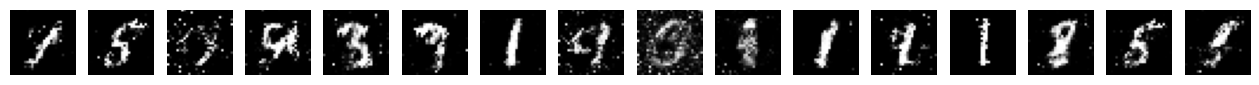

Epoch [2/5], Step [0/938], Loss D: 0.6617743074893951, Loss G: 1.646742820739746
Epoch [2/5], Step [100/938], Loss D: 0.8986579179763794, Loss G: 1.463381052017212
Epoch [2/5], Step [200/938], Loss D: 0.7350044250488281, Loss G: 2.3457562923431396
Epoch [2/5], Step [300/938], Loss D: 0.753737211227417, Loss G: 1.3371754884719849
Epoch [2/5], Step [400/938], Loss D: 0.8677139282226562, Loss G: 2.2224555015563965
Epoch [2/5], Step [500/938], Loss D: 1.112197533249855, Loss G: 1.4636361598968506
Epoch [2/5], Step [600/938], Loss D: 1.0303398072719574, Loss G: 1.3801352977752686
Epoch [2/5], Step [700/938], Loss D: 0.7548066973686218, Loss G: 1.760959506034851
Epoch [2/5], Step [800/938], Loss D: 0.7585327327251434, Loss G: 2.170167922973633
Epoch [2/5], Step [900/938], Loss D: 0.6919870972633362, Loss G: 1.932116985321045


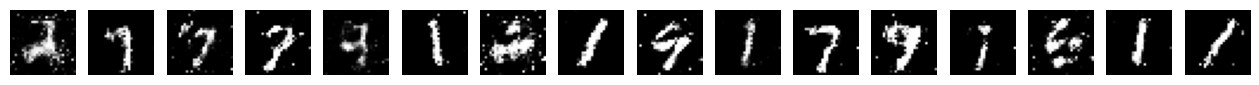

Epoch [3/5], Step [0/938], Loss D: 0.7628752887248993, Loss G: 1.9551875591278076
Epoch [3/5], Step [100/938], Loss D: 1.3755525648593903, Loss G: 0.997611403465271
Epoch [3/5], Step [200/938], Loss D: 0.9127171039581299, Loss G: 1.500525951385498
Epoch [3/5], Step [300/938], Loss D: 0.7729991376399994, Loss G: 1.6111550331115723
Epoch [3/5], Step [400/938], Loss D: 0.8792228251695633, Loss G: 2.3985023498535156
Epoch [3/5], Step [500/938], Loss D: 0.6015165150165558, Loss G: 1.898668646812439
Epoch [3/5], Step [600/938], Loss D: 0.729422926902771, Loss G: 1.889207124710083
Epoch [3/5], Step [700/938], Loss D: 0.9586754441261292, Loss G: 1.5835202932357788
Epoch [3/5], Step [800/938], Loss D: 0.812003880739212, Loss G: 2.0116147994995117
Epoch [3/5], Step [900/938], Loss D: 0.8656321167945862, Loss G: 1.7040479183197021


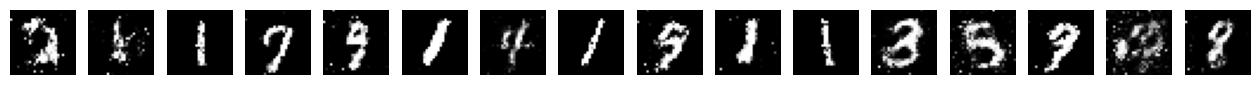

Epoch [4/5], Step [0/938], Loss D: 0.865735650062561, Loss G: 2.3881468772888184
Epoch [4/5], Step [100/938], Loss D: 0.9034781455993652, Loss G: 1.304980754852295
Epoch [4/5], Step [200/938], Loss D: 0.9333969950675964, Loss G: 1.939599633216858
Epoch [4/5], Step [300/938], Loss D: 0.8569595217704773, Loss G: 1.5884416103363037
Epoch [4/5], Step [400/938], Loss D: 0.6776744425296783, Loss G: 1.81044340133667
Epoch [4/5], Step [500/938], Loss D: 1.1601785570383072, Loss G: 1.4028291702270508
Epoch [4/5], Step [600/938], Loss D: 0.9020708799362183, Loss G: 1.9837312698364258
Epoch [4/5], Step [700/938], Loss D: 0.9600727558135986, Loss G: 1.176612138748169
Epoch [4/5], Step [800/938], Loss D: 1.0650262236595154, Loss G: 1.2163150310516357
Epoch [4/5], Step [900/938], Loss D: 1.0376036167144775, Loss G: 1.8274128437042236


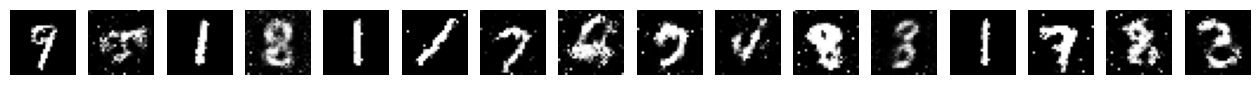

In [15]:
num_epochs = 5
real_label = 1
fake_label = 0

for epoch in range(num_epochs):
    for i, (real_images, _) in enumerate(train_loader):
        batch_size = real_images.size(0)
        
        real_images = real_images.to(device)
        
        # Обновляем дискриминатор
        discriminator.zero_grad()

        # Реальные изображения
        label = torch.full((batch_size,), real_label, device=device)
        label = label.unsqueeze(1).float()
        output = discriminator(real_images)
        loss_D_real = criterion(output, label)
        loss_D_real.backward()

        # Генерируем поддельные изображения
        noise = torch.randn(batch_size, 100, device=device)
        fake_images = generator(noise)
        label.fill_(fake_label)
        output = discriminator(fake_images.detach())
        loss_D_fake = criterion(output, label)
        loss_D_fake.backward()

        optimizer_D.step()

        # Обновляем генератор
        generator.zero_grad()
        label.fill_(real_label)  # Подделка теперь должна быть классифицирована как реальная
        output = discriminator(fake_images)
        loss_G = criterion(output, label)
        loss_G.backward()

        optimizer_G.step()

        if i % 100 == 0:
            print(f'Epoch [{epoch}/{num_epochs}], Step [{i}/{len(train_loader)}], Loss D: {loss_D_real.item() + loss_D_fake.item()}, Loss G: {loss_G.item()}')

    # Печатаем изображения каждую эпоху
    with torch.no_grad():
        fake_images = generator(torch.randn(16, 100, device=device))
        fake_images = fake_images.cpu().data
        fig, axes = plt.subplots(1, 16, figsize=(16, 1))
        for i in range(16):
            axes[i].imshow(fake_images[i].squeeze(), cmap='gray')
            axes[i].axis('off')
        plt.show()